In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
ab_data = pd.read_csv('../data/ab_data.csv')

In [167]:
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [168]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [169]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')

In [170]:
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


In [171]:
daily_data['conversion'] = daily_data['converted']/daily_data['users_count']*100

In [172]:
daily_data.query("group == 'A' and timestamp == '2017-01-05'").round(2)

,timestamp,group,users_count,converted,conversion
6,2017-01-05,A,6419,791,12.32


In [173]:
daily_data.head()

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361


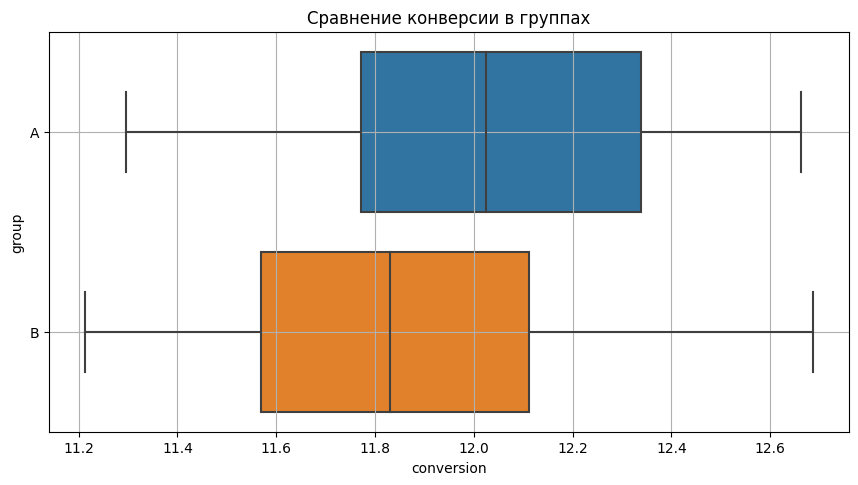

In [174]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax) 
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid();

In [175]:
conversion_piv = daily_data.groupby('group')['conversion'].agg(
    ['mean', 'median']
)
display(conversion_piv)

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


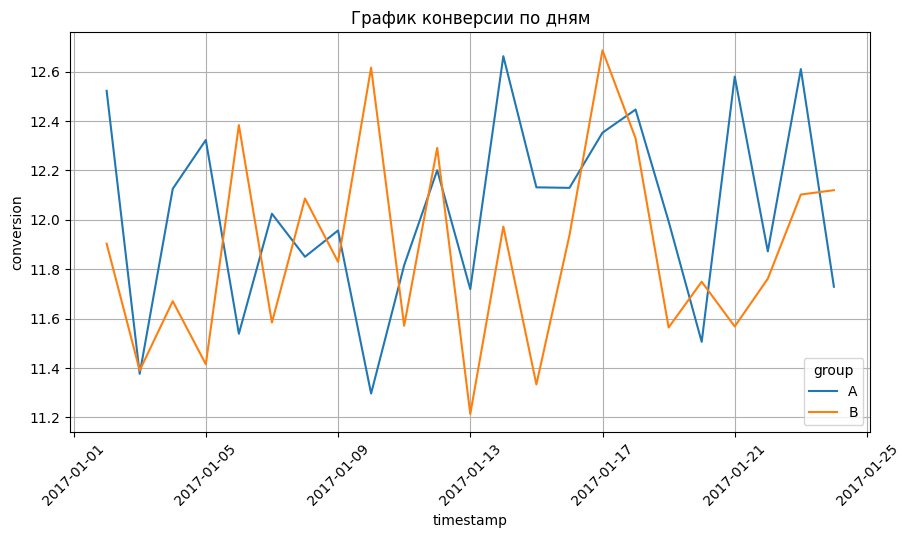

In [176]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid();

In [177]:
# выделяем данные группы А
daily_data_a = daily_data[daily_data['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()
# выводим время, количество посетителей и кумулятивное количество посетителей
display(daily_data_a[['timestamp', 'users_count', 'cum_users_count']].head())

/var/folders/18/xwlc5znx4tz1pcrtznkl3fch0000gn/T/ipykernel_36205/906787284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()


,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


In [178]:
# вычисляем кумулятивную сумму количества посетителей
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# вычисляем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100
display(daily_data.head())

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806


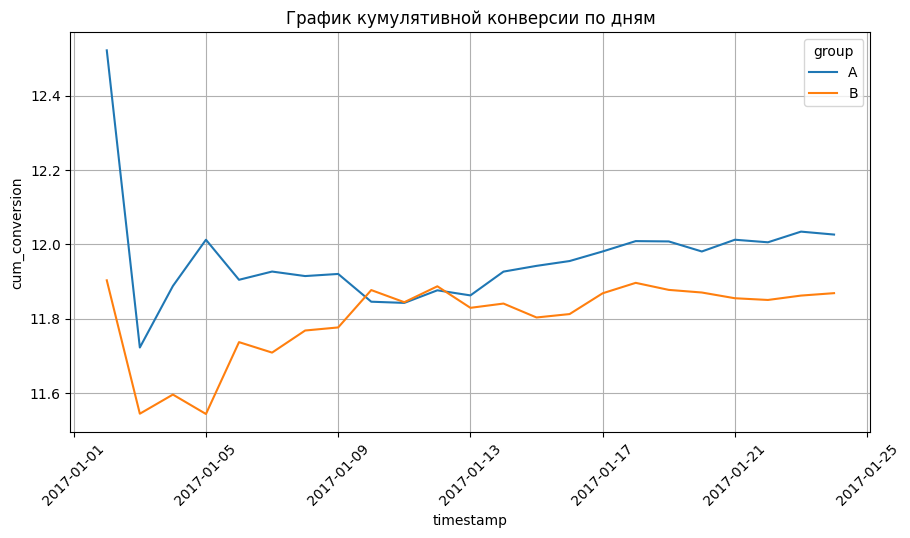

In [179]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

---

In [180]:
#Tasks 4.6 - 4.9
sample_a = pd.read_csv('../data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('../data/ab_test-redesign_sample_b.csv')

In [181]:
sample_a.head(), sample_b.head()

(         date           cid  transactions  revenue group
 0  2020-11-06  1.001648e+09             0        0     A
 1  2020-11-06  1.001936e+09             0        0     A
 2  2020-11-06  1.003214e+08             0        0     A
 3  2020-11-06  1.004393e+09             0        0     A
 4  2020-11-06  1.006382e+09             0        0     A,
          date           cid  transactions  revenue group
 0  2020-11-06  1.000135e+09             0        0     B
 1  2020-11-06  1.001648e+09             0        0     B
 2  2020-11-06  1.003214e+08             0        0     B
 3  2020-11-06  1.003652e+09             0        0     B
 4  2020-11-06  1.003833e+09             0        0     B)

In [182]:
join_df = pd.concat([sample_a, sample_b])
join_df['date'] = pd.to_datetime(join_df['date'])

In [183]:
group_df = join_df.groupby(['date', 'group']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
    }).reset_index().rename(columns={
        'cid':'clients',
        'transactions':'transactions_sum',
        'revenue':'revenue_sum'
        })
group_df.head()

,date,group,clients,transactions_sum,revenue_sum
0,2020-11-06,A,2576,16,1577279
1,2020-11-06,B,2499,19,996645
2,2020-11-07,A,2704,23,1721886
3,2020-11-07,B,2804,19,555499
4,2020-11-08,A,3354,25,846051


In [184]:
#4.6
x = group_df.query("group == 'A' and date == '2020-11-08'")
x

,date,group,clients,transactions_sum,revenue_sum
4,2020-11-08,A,3354,25,846051


In [185]:
group_df.head()

,date,group,clients,transactions_sum,revenue_sum
0,2020-11-06,A,2576,16,1577279
1,2020-11-06,B,2499,19,996645
2,2020-11-07,A,2704,23,1721886
3,2020-11-07,B,2804,19,555499
4,2020-11-08,A,3354,25,846051


In [186]:
#4.7
'''group_df = group_df.agg({
    'clients':'cumsum',
    'transactions_sum':'cumsum',
    'revenue_sum':'cumsum'
    })'''

"group_df = group_df.agg({\n    'clients':'cumsum',\n    'transactions_sum':'cumsum',\n    'revenue_sum':'cumsum'\n    })"

In [187]:
group_df.head()

,date,group,clients,transactions_sum,revenue_sum
0,2020-11-06,A,2576,16,1577279
1,2020-11-06,B,2499,19,996645
2,2020-11-07,A,2704,23,1721886
3,2020-11-07,B,2804,19,555499
4,2020-11-08,A,3354,25,846051


In [188]:
#4.7
# Добавьте в каждую из таблиц кумулятивные метрики:

# *кумулятивное количество посетителей сайта;
# *кумулятивное суммарное число транзакций;
# *кумулятивная общая сумма покупок (кумулятивная выручка).
#Рассчитайте кумулятивную конверсию действия покупки (в процентах) и кумулятивный средний чек (кумулятивная выручка/кумулятивное суммарное число транзакций).
#Чему равна средняя кумулятивная конверсия в группах за весь период проведения A/B-теста? Ответ округлите до сотых, знаки процентов не вводите.

group_df['clients_cum'] = group_df.groupby('group')['clients'].cumsum()
group_df['transactions_cum'] = group_df.groupby('group')['transactions_sum'].cumsum()
group_df['revenue_cum'] = group_df.groupby('group')['revenue_sum'].cumsum()
group_df['conversion_cum'] = round(group_df['transactions_cum']/group_df['clients_cum']*100,2)
group_df['avg_revenue_cum'] = round(group_df['revenue_cum']/group_df['transactions_cum'],2)
group_df.head()

,date,group,clients,transactions_sum,revenue_sum,clients_cum,transactions_cum,revenue_cum,conversion_cum,avg_revenue_cum
0,2020-11-06,A,2576,16,1577279,2576,16,1577279,0.62,98579.94
1,2020-11-06,B,2499,19,996645,2499,19,996645,0.76,52455.00
2,2020-11-07,A,2704,23,1721886,5280,39,3299165,0.74,84593.97
3,2020-11-07,B,2804,19,555499,5303,38,1552144,0.72,40845.89
4,2020-11-08,A,3354,25,846051,8634,64,4145216,0.74,64769.00


In [189]:
group_df.query("group == 'A'")['conversion_cum'].mean().round(2)

0.71

In [190]:
group_df.query("group == 'B'")['conversion_cum'].mean().round(2)

0.76

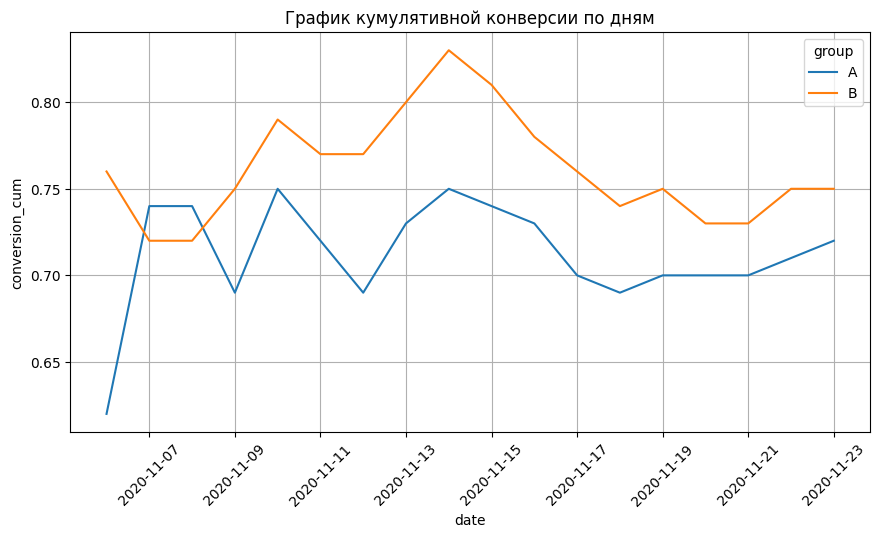

In [191]:
#4.8
#Постройте графики кумулятивной конверсии в каждой группе. Какие выводы по ним вы можете сделать?

fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([1,1,1,1])
sns.lineplot(
    x='date',
    y='conversion_cum',
    data=group_df,
    hue='group',
    ax=ax
)
ax.set_title('График кумулятивной конверсии по дням')
ax.xaxis.set_tick_params(rotation = 45)
ax.grid(True);

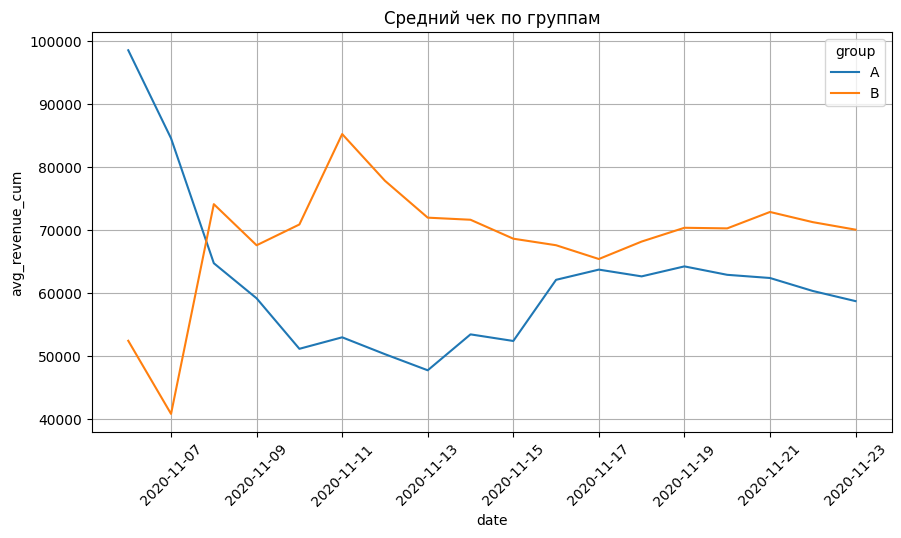

In [192]:
#4.9
#Постройте графики кумулятивного среднего чека в каждой группе. Какие выводы по ним вы можете сделать?

fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([1,1,1,1])
sns.lineplot(
    x='date',
    y='avg_revenue_cum',
    data=group_df,
    hue='group',
    ax=ax
)
ax.set_title('Средний чек по группам')
ax.xaxis.set_tick_params(rotation=45)
ax.grid(True)

---

In [193]:
from statsmodels.stats.proportion import proportions_ztest
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [194]:
converted_piv= ab_data.groupby('group')['converted'].agg(
    ['sum', 'count']
)
display(converted_piv)

,sum,count
group,,
A,17467,145241
B,17238,145241


In [195]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А выше, чем конверсия в группе B'
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], #число "успехов"
    nobs=converted_piv['count'], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value:  0.1
# Принимаем нулевую гипотезу. Конверсии в группах А и B равны

p-value:  0.1
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


---

In [196]:
time_data = pd.read_excel('../data/time_data.xlsx')
display(time_data.head())

,time(A),time(B)
0,435.0,549.2
1,454.5,630.2
2,447.0,437.2
3,480.0,637.2
4,561.0,712.4


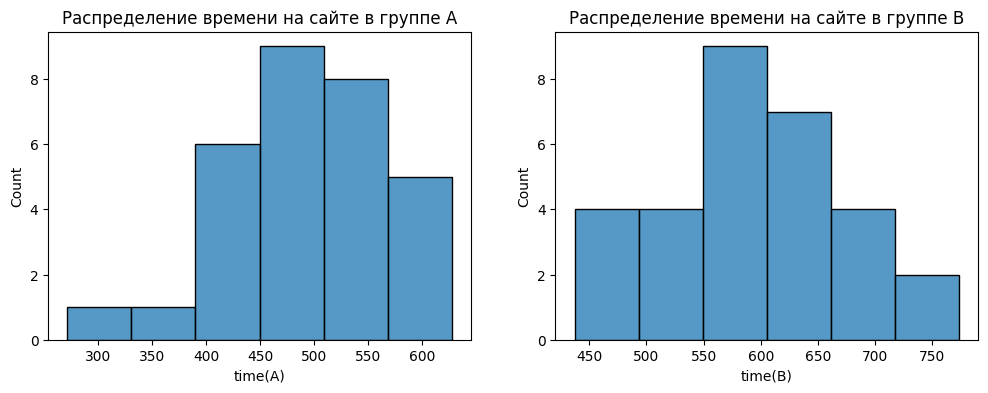

In [197]:
#создаём 2 графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='time(A)', data=time_data, ax=axes[0])
sns.histplot(x='time(B)', data=time_data, ax=axes[1])
#задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А');
axes[1].set_title('Распределение времени на сайте в группе B');

In [198]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(time_data['time(A)'])
shapiro_result_b = shapiro(time_data['time(B)'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value группы А 0.43
# p-value группы B 0.12
# Принимаем нулевую гипотезу. Распределения в обеих группах нормальные

p-value группы А 0.43
p-value группы B 0.12
Принимаем нулевую гипотезу. Распределения в обеих группах нормальные


In [199]:
from scipy.stats import ttest_ind
# нулевая и альтернативная гипотезы
H0 = 'Среднее время в группах одинаково'
H1 = 'Среднее время в группе А меньше, чем в группе B'
alpha = 0.05 #уровень значимости
#вычисляем результат T-теста для выборок
results = ttest_ind(
    a=time_data['time(A)'],
    b=time_data['time(B)'], 
    alternative='less'
)
print('p-value:', round(results.pvalue, 2))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
    
# p-value: 0.0
# Отвергаем нулевую гипотезу. Среднее время в группах одинаково
# Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B

p-value: 0.0
Отвергаем нулевую гипотезу. Среднее время в группах одинаково
Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B


In [200]:
#Задание 5.2
# Проверьте гипотезу о равенстве конверсий в группах А и B при альтернативной гипотезе: Конверсия в группе А меньше, чем конверсия в группе B. 
# Используйте функцию proportions_ztest() из модуля statsmodels.stats.proportion. В качестве уровня значимости возьмите alpha = 0.1

df = join_df.groupby(['date', 'group']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={
    'cid':'number_of_cliets'
})

In [201]:
df['convertion'] = round(df['transactions']/df['number_of_cliets']*100,2)
df_a = df.query("group == 'A'")
df_b = df.query("group == 'B'")
df_a.head(), df_b.head()

(        date group  number_of_cliets  transactions  revenue  convertion
 0 2020-11-06     A              2576            16  1577279        0.62
 2 2020-11-07     A              2704            23  1721886        0.85
 4 2020-11-08     A              3354            25   846051        0.75
 6 2020-11-09     A              3234            18   708830        0.56
 8 2020-11-10     A              3022            29   826984        0.96,
         date group  number_of_cliets  transactions  revenue  convertion
 1 2020-11-06     B              2499            19   996645        0.76
 3 2020-11-07     B              2804            19   555499        0.68
 5 2020-11-08     B              3291            24  3044842        0.73
 7 2020-11-09     B              3062            25  1285836        0.82
 9 2020-11-10     B              3072            30  2414726        0.98)

In [202]:
transpond_df = df_a.merge(df_b, on='date', suffixes=('_A','_B'))
transpond_df.head(), df.head()

(        date group_A  number_of_cliets_A  transactions_A  revenue_A  \
 0 2020-11-06       A                2576              16    1577279   
 1 2020-11-07       A                2704              23    1721886   
 2 2020-11-08       A                3354              25     846051   
 3 2020-11-09       A                3234              18     708830   
 4 2020-11-10       A                3022              29     826984   
 
    convertion_A group_B  number_of_cliets_B  transactions_B  revenue_B  \
 0          0.62       B                2499              19     996645   
 1          0.85       B                2804              19     555499   
 2          0.75       B                3291              24    3044842   
 3          0.56       B                3062              25    1285836   
 4          0.96       B                3072              30    2414726   
 
    convertion_B  
 0          0.76  
 1          0.68  
 2          0.73  
 3          0.82  
 4          0.98  ,

In [203]:
#Задание 5.2
#Проверьте гипотезу о равенстве конверсий в группах А и B при альтернативной гипотезе: 
# Конверсия в группе А меньше, чем конверсия в группе B. Используйте функцию proportions_ztest() из модуля statsmodels.stats.proportion. 
# В качестве уровня значимости возьмите alpha = 0.1

from statsmodels.stats.proportion import proportions_ztest
hipotesis_df = df.groupby('group')[['group','transactions', 'number_of_cliets']].apply('sum').reset_index()
hipotesis_df.head()

/var/folders/18/xwlc5znx4tz1pcrtznkl3fch0000gn/T/ipykernel_36205/3758666923.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hipotesis_df = df.groupby('group')[['group','transactions', 'number_of_cliets']].apply('sum').reset_index()


,group,transactions,number_of_cliets
0,A,441,61571
1,B,463,61383


In [204]:
H0 = 'Конверсия групп А и В равны'
H1 = 'Конверсия в группе А меньше, чем конверсия в группе B'
alpha = 0.1
_, p_value = proportions_ztest(
    count=hipotesis_df['transactions'],
    nobs=hipotesis_df['number_of_cliets'],
    alternative='smaller'
)
if p_value < alpha:
    print(H1)
else:
    print(H0)

Конверсия групп А и В равны


In [205]:
#Задание 5.3
#Проверьте гипотезу о нормальности распределений ежедневного среднего чека с помощью критерия Шапиро-Уилка. 
#В качестве уровня значимости возьмите alpha = 0.1

from scipy.stats import shapiro
alpha = 0.1
H0='Распределение нормальное'
H1='Распределение не нормальное'

df_a['mean_rev'] = df_a['revenue']/df_a['number_of_cliets']
df_b['mean_rev'] = df_b['revenue']/df_b['number_of_cliets']
hipotesis2_df = df_a.merge(df_b, on='date',suffixes=('_A','_B'))
hipotesis2_df = hipotesis2_df[['mean_rev_A','mean_rev_B']]
hipotesis2_df.head()

/var/folders/18/xwlc5znx4tz1pcrtznkl3fch0000gn/T/ipykernel_36205/3845039979.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['mean_rev'] = df_a['revenue']/df_a['number_of_cliets']
/var/folders/18/xwlc5znx4tz1pcrtznkl3fch0000gn/T/ipykernel_36205/3845039979.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['mean_rev'] = df_b['revenue']/df_b['number_of_cliets']


,mean_rev_A,mean_rev_B
0,612.297748,398.817527
1,636.792160,198.109486
2,252.251342,925.202674
3,219.180581,419.933377
4,273.654533,786.043620


In [206]:
_,p_value = shapiro(hipotesis2_df)
if p_value > alpha:
    print(H0)
else:
    print(H1)

Распределение не нормальное


In [207]:
#Задание 5.4
#Проверьте гипотезу о равенстве ежедневных средних чеков с помощью критерия Манна-Уитни при альтернативной гипотезе: 
#Ежедневный средний чек в группе А меньше, чем в группе B. Используйте функцию mannwhitneyu() из модуля scipy.stats. 
#В качестве уровня значимости возьмите alpha = 0.1

from scipy.stats import mannwhitneyu
alpha = 0.1
H0 = 'Ежедневный средний чек в группе А равен группе B'
H1 = 'Ежедневный средний чек в группе А меньше, чем в группе B'
mean_rev_A = hipotesis2_df['mean_rev_A']
mean_rev_B = hipotesis2_df['mean_rev_B']
_,p_value = mannwhitneyu(mean_rev_A,mean_rev_B,method='auto',alternative='less')
if p_value > alpha:
    print(H0)
else:
    print(H1)

Ежедневный средний чек в группе А меньше, чем в группе B


---

In [208]:
from scipy.stats import norm
n = 36 # размер выборки
x_mean = 16100 # выборочное среднее
sigma = 12000 # истинное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

z_crit = -norm.ppf(alpha/2) # z критическое

eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print(f'Доверительный интервал: {confidence_interval}') # выводим результат

Доверительный интервал: (12180, 20020)


In [209]:
def confidence_interval_sigma(n, x_mean, sigma, gamma):
    """Function to evaluate confidence interval with known true standard deviation

    Args:
        n (int): sample size
        x_mean (int): sample mean
        sigma (int): true standard deviation
        gamma (float): reliability level 0-1

    Returns:
        float: lower_bound, upper_bound
    """
    alpha = 1 - gamma # уровень значимости

    z_crit = round(-norm.ppf(alpha/2),2) # z критическое

    eps = z_crit * sigma/(n ** 0.5) #погрешность
    lower_bound = round(x_mean - eps,2) # левая (нижняя) граница
    upper_bound = round(x_mean + eps,2) # правая (верхняя) граница
    confidence_interval = (lower_bound, upper_bound) # создаём кортеж из округлённых границ интервала
    print(f'Доверительный интервал: {lower_bound, upper_bound}, z-крит: {z_crit}') # выводим результат
    return lower_bound, upper_bound, z_crit

In [210]:
#Task 6.5
#Аккумуляторный завод производит батарейки, срок службы которых имеет истинное стандартное отклонение в 2.4 месяца. 
#Средний срок службы батареек в случайной выборке из 64 штук составил 12.35 месяца. 
#Необходимо построить 90 %-ный доверительный интервал для истинного среднего срока службы производимой батарейки
#и ответить на вопросы заданий ниже.

#Чему равно значение z-критического для такого интервала? Введите число с двумя знаками после разделительного знака.

l,u,_ = confidence_interval_sigma(n=64,x_mean=12.35,sigma=2.4,gamma=0.9)

Доверительный интервал: (11.86, 12.84), z-крит: 1.64


---

Управляющий супермаркета хочет оценить, сколько денег покупатели тратят за один поход в супермаркет в среднем. На основании ранее собранных данных известно, что расходы одного покупателя распределены приблизительно нормально. Управляющий взял случайную выборку из 15 покупателей и выяснил, что их средние расходы равны 2 000 рублей, а выборочное стандартное отклонение равно 400 рублей.

In [211]:
from scipy.stats import t
n = 15 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 2000 # выборочное среднее
x_std = 400 # выборочное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

t_crit = -t.ppf(alpha/2, k) # t-критическое

eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (1778, 2222)


In [212]:
def confidence_interval(n, x_mean, x_std, gamma):
    """_summary_

    Args:
        n (int): sample size
        x_mean (int): sample mean
        x_std (int, float): sample standard deviation
        gamma (float): reliability level 0-1
    """
    k = n - 1  # число степеней свободы
    alpha = 1 - gamma  # уровень значимости

    t_crit = -t.ppf(alpha/2, k)  # t-критическое

    eps = t_crit * x_std/(n ** 0.5)  # погрешность
    lower_bound = round(x_mean - eps, 2)  # левая (нижняя) граница
    upper_bound = round(x_mean + eps, 2)  # правая (верхняя) граница
    # создаём кортеж из округлённых границ интервала
    confidence_interval = (lower_bound, upper_bound)
    print(
        f'Доверительный интервал: {lower_bound, upper_bound}, t-крит: {t_crit}')
    return lower_bound, upper_bound, t_crit


In [213]:
l,u,_ = confidence_interval(n=15,x_mean=2000,x_std=400,gamma=0.95)

Доверительный интервал: (1778.49, 2221.51), t-крит: 2.1447866879169273


In [214]:
#Task 6.6
#Чиновника интересует сумма подоходного налога, выплачиваемого домохозяйствами за год. 
#На случайной выборке из 25 домохозяйств был посчитан средний размер выплаченного налога, и он составил $ 3 540. 
#Также известно выборочное отклонение величины подоходного налога, равное $ 1 150.

l,u,_ = confidence_interval(n=25, x_mean=3540, x_std=1150, gamma=0.9)

Доверительный интервал: (3146.5, 3933.5), t-крит: 1.7108820799094282


---

In [224]:
# Доверительный интервал для пропорции (например конверсии)
def proportions_conf_interval(n, x_p, gamma=0.95):
    """Function to evaluate confidence interval for proportion and
    true standard deviation.

    Args:
        n (int): sample size
        x_p (int): sample proportion (% of success)
        gamma (float): reliability level 0-1

    Returns:
        float: lower_bound, upper_bound, sigma
    """
    alpha = 1 - gamma  # уровень значимости
    z_crit = -norm.ppf(alpha/2)  # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5  # погрешность
    sigma = round((x_p * (1 - x_p))**0.5, 3) #true standard deviation

    lower_bound = round((x_p - eps)*100, 2)  # левая (нижняя) граница
    upper_bound = round((x_p + eps)*100, 2)  # правая (верхняя) граница

    print(
        f'Доверительный интервал: {lower_bound, upper_bound}, z-крит: {z_crit}, sigma: {sigma}')
    return lower_bound, upper_bound, sigma


In [216]:
ab_data.head()


,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [217]:
#фильтруем данные группы А
a_data = ab_data.query("group == 'A'")
#фильтруем данные группы B
b_data = ab_data.query("group == 'B'")

In [218]:
conf_interval_a = proportions_conf_interval(
n=a_data['user_id'].count(), # размер выборки
x_p=a_data['converted'].mean() # выборочная пропорция
)
conf_interval_b = proportions_conf_interval(
n=b_data['user_id'].count(), # размер выборки
x_p=b_data['converted'].mean() # выборочная пропорция
)
print(conf_interval_a,conf_interval_b)

Доверительный интервал: (11.86, 12.19), z-крит: 1.959964, sigma: 0.325
Доверительный интервал: (11.7, 12.03), z-крит: 1.959964, sigma: 0.323
(11.86, 12.19, 0.325) (11.7, 12.03, 0.323)


In [219]:
# Доверительный интервал разницы пропорции (например конверсии)
def diff_proportions_conf_interval(n, x_p, gamma=0.95):
    """Function to evaluate confidence interval for delta of proportion.

    Args:
        n (list): list of samples sizes (for example: n = [a_data['user_id'].count(), b_data['user_id'].count()])
        x_p (list): list of samples proportions (for example: xp = [a_data['converted'].mean(), b_data['converted'].mean()])
        gamma (float, optional): reliability level 0-1

    Returns:
        float: lower_bound, upper_bound,
    """

    alpha = 1 - gamma  # уровень значимости
    diff = x_p[1] - x_p[0]  # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2)  # z критическое
    eps = z_crit * (x_p[0] * (1 - x_p[0])/n[0] + x_p[1] *
                    (1 - x_p[1])/n[1]) ** 0.5  # погрешность

    lower_bound = round((diff - eps)*100, 2)  # левая (нижняя) граница
    upper_bound = round((diff + eps)*100, 2)  # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return lower_bound, upper_bound


In [220]:
# размеры выборок групп А и B
n = [a_data['user_id'].count(), b_data['user_id'].count()]
# выборочная пропорция групп A и B
xp = [a_data['converted'].mean(), b_data['converted'].mean()]
# строим доверительный интервал для разности конверсий
diff_inverval = diff_proportions_conf_interval(n, xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_inverval))
 
# Доверительный интервал для разности конверсий: (-0.39, 0.08)

Доверительный интервал для разности конверсий: (-0.39, 0.08)


In [229]:
#Task 6.9

In [227]:
x_p = 132/189
x_p

0.6984126984126984

In [228]:
proportions_conf_interval(n=189,x_p=x_p,gamma=0.9)

Доверительный интервал: (64.35, 75.33), z-крит: 1.6448536269514729, sigma: 0.459


(64.35, 75.33, 0.459)

In [231]:
#task 6.10
diff_proportions_conf_interval(n=[1000,1000],x_p=[45/1000,50/1000],gamma=0.95)

(-1.36, 2.36)

---